In [0]:
#@title Feature_detection Libs
!mkdir "/content/images/"
!mkdir "/content/images/tools"

!unzip "/content/drive/My Drive/neural/deep-learning-face-detection.zip" -d "/content/images/tools"
!unzip "/content/drive/My Drive/neural/neural_feature_follower.zip" -d "/content/images/tools"

mkdir: cannot create directory ‘/content/images/’: File exists
mkdir: cannot create directory ‘/content/images/tools’: File exists
Archive:  /content/drive/My Drive/neural/deep-learning-face-detection.zip
   creating: /content/images/tools/deep-learning-face-detection/
  inflating: /content/images/tools/deep-learning-face-detection/deploy.prototxt.txt  
  inflating: /content/images/tools/deep-learning-face-detection/detect_faces.py  
  inflating: /content/images/tools/deep-learning-face-detection/detect_faces_video.py  
  inflating: /content/images/tools/deep-learning-face-detection/iron_chic.jpg  
  inflating: /content/images/tools/deep-learning-face-detection/res10_300x300_ssd_iter_140000.caffemodel  
  inflating: /content/images/tools/deep-learning-face-detection/rooster.jpg  
Archive:  /content/drive/My Drive/neural/neural_feature_follower.zip
  inflating: /content/images/tools/neural_feature_follower/NN3W.dat  
  inflating: /content/images/tools/neural_feature_follower/Readme.txt 

In [0]:
import cv2
import os
def get_code(img_rgb):
    img_rgb=cv2.resize(img_rgb,(500,500))
    n1,n2,val=paint(img_rgb)
    return n1,n2,val
  
  
  
  
  
import dlib
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/images/tools/neural_feature_follower/NN3W.dat")
def paint(im):
  image=im
  #image = cv2.resize(image,(500,500))
  #dest=dest
  image2=image[:,:,:].copy()
  hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  val=False
  rects = detector(gray, 1)
  for (i, rect) in enumerate(rects):
        val=True
        if(i>0):
          break  
        features = predictor(gray, rect)
        mouth=[]
        mouth2=[]
        
        for b in range(68):
            p1=[features.part(b).x,features.part(b).y]
            if(b>=48 and b<=59):
              mouth.append(p1) 
            if(b>=60 and b<=68):
              mouth2.append(p1)
              
       
        
        
        cont_b=np.array(mouth)
        peri_b=cv2.arcLength(cont_b, True)
        approx_b=cv2.approxPolyDP(cont_b, 0.02 * peri_b, True)
        x_b, y_b, w_b, h_b = cv2.boundingRect(approx_b)
        normm1=(np.array(mouth)-(x_b,y_b))/(w_b,h_b)
        normm2=(np.array(mouth2)-(x_b,y_b))/(w_b,h_b)
        return normm1,normm2,val

  
  
  



import glob
n1t=[]
n2t=[]
for (f,a,g) in os.walk("/content/drive/My Drive/tempo/dataset/"):
  print(f)
  
  for file in glob.glob(f+"/*.jpg"):
    try:
      
      imga=cv2.imread(file)
      n1,n2,val=get_code(imga)
      
      if(val):
        n1t.append(n1)
        n2t.append(n2)
        print("Ready")
    except:
      print("Error")
      
      
        
        
  
      




/content/drive/My Drive/tempo/dataset/
/content/drive/My Drive/tempo/dataset/nariz
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/nevará
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/nicaragua
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/números
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/novella
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/zapato
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/tomate
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
Ready
/content/drive/My Drive/tempo/dataset/innovar
Ready
Ready
Ready
Ready
Ready
Ready
Ready


In [0]:
#@title Data_setting



x1=np.array(n1t) 
x2=np.array(n2t)

nt=[]
for j,ni in enumerate(x1):
  nt.append(np.concatenate((ni,x2[j]),axis=0))
features=np.array(nt).reshape(x1.shape[0],-1)
#40 features de los 20 puntos en x
x=features








0.972467621395383


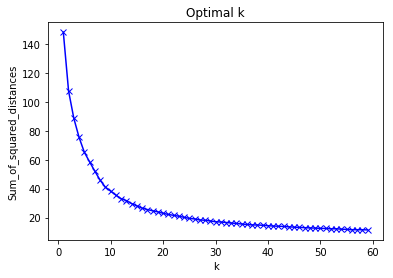

In [0]:
#@title kmean_and_pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#transforma los datos de posx y posy de los features y disminuye el numero de features con una 
#perdida de varianza de 3%
pca = PCA(0.97)
data_s2=pca.fit_transform(x)

print(pca.explained_variance_ratio_.sum())


#Clasificacion de los datos y determinacion del numero minimo de clusters


Sum_of_squared_distances = []
K = range(1,60)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_s2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()    




In [0]:
#La inercia disminuye rapidamente luego de los 30 clusters
#n_clusters=30
km = KMeans(n_clusters=30)
km = km.fit(data_s2)
print(pca.explained_variance_ratio_.sum())


0.972467621395383


In [0]:
class char():
    def __init__(self):
        pass
    
class char_line():
    def __init__(self, word):
        self.word = word
        self.char_line = [(char, self.char_type(char)) for char in word]
        self.type_line = ''.join(chartype for char, chartype in self.char_line)
        
    def char_type(self, char):
        if char in set(['a', 'á', 'e', 'é','o', 'ó', 'í', 'ú']):
            return 'V' #strong vowel
        if char in set(['i', 'u']):
            return 'v' #week vowel
        if char=='x':
            return 'x'
        if char=='s':
            return 's'
        else:
            return 'c'
            
    def find(self, finder):
        return self.type_line.find(finder)
        
    def split(self, pos, where):
        return char_line(self.word[0:pos+where]), char_line(self.word[pos+where:])
    
    def split_by(self, finder, where):
        split_point = self.find(finder)
        if split_point!=-1:
            chl1, chl2 = self.split(split_point, where)
            return chl1, chl2
        return self, False
     
    def __str__(self):
        return '<'+self.word+':'+self.type_line+'>'
    
    def __repr__(self):
        return '<'+repr(self.word)+':'+self.type_line+'>'

class silabizer():
    def __init__(self):
        self.grammar = []
        
    def split(self, chars):
        rules  = [('VV',1), ('cccc',2), ('xcc',1), ('ccx',2), ('csc',2), ('xc',1), ('cc',1), ('vcc',2), ('Vcc',2), ('sc',1), ('cs',1),('Vc',1), ('vc',1), ('Vs',1), ('vs',1), ('vxv',1), ('VxV',1), ('vxV',1), ('Vxv',1)]
        for split_rule, where in rules:
            first, second = chars.split_by(split_rule,where)
            if second:
                if first.type_line in set(['c','s','x','cs']) or second.type_line in set(['c','s','x','cs']):
                    #print 'skip1', first.word, second.word, split_rule, chars.type_line
                    continue
                if first.type_line[-1]=='c' and second.word[0] in set(['l','r']):
                    continue
                if first.word[-1]=='l' and second.word[-1]=='l':
                    continue
                if first.word[-1]=='r' and second.word[-1]=='r':
                    continue
                if first.word[-1]=='c' and second.word[-1]=='h':
                    continue
                return self.split(first)+self.split(second)
        return [chars]
        
    def __call__(self, word):
        return self.split(char_line(word))

In [0]:
#@title One hot encoding sobre las silabas

filename="/content/dictionary"
dictionary=[]
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
with open(filename) as f:
    lines = f.readlines()
    for k,line in enumerate(lines):
      if(k==399):
        break
      #print(line.split()[0])
      dictionary.append(line.split()[0])
s=silabizer() 
import numpy as np
      
def encode(sentence):
  code=[]
  sentence=sentence.lower()
  words=word_tokenize(sentence)
  for word in words:
    for silaba in s(word):
      code.append(dictionary.index(silaba.word))
    code.append(0) 
  return code[0:-1] 



max_length_encoder_input=15
max_length_decoder_output=20
def get_one_hot(word):
  enc=np.zeros((max_length_encoder_input,len(dictionary)+1))
  code=encode(word)
  for k in range(max_length_encoder_input):
    try:
      enc[k][code[k]]=1
    except:
      enc[k][0]=1
  return enc
  
     
print(get_one_hot("hola").shape)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
(15, 400)


In [0]:
print(pca.explained_variance_ratio_.sum())
states=30
max_length_decoder_output=20


def get_one_hot_image(images_path):
  enc=np.zeros((max_length_decoder_output,states+1))
  code=encode_image(images_path)
  for k in range(max_length_decoder_output):
    try:
      enc[k][code[k]]=1
    except:
      enc[k][0]=1
  return enc




def encode_image(images_path):
  global pca
  data=[]
  for path in glob.glob(images_path+"/*.jpg"):
    
    im=cv2.imread(path)
    n1,n2,val=paint(im)
    nt=np.concatenate((n1,n2),axis=0)
    nt=nt.reshape(-1,40)
    s1=pca.transform(nt)
    s1=km.predict(s1)
    data.append(s1)
  return data  
  
  
print(get_one_hot_image("/content/drive/My Drive/tempo/dataset/alcohol"))
  
  
  

#dft=get_one_hot_image("/content/drive/My Drive/tempo/dataset/alcohol/12.jpg")
  

0.972467621395383
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0.]
 [